# Q1

Make some data from normal distribution:

In [502]:
import numpy as np
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    return x

x = make_data(1000)

Part A: Plot histogram of x for bins = 3, 10, 30 and 300 and compare the result.

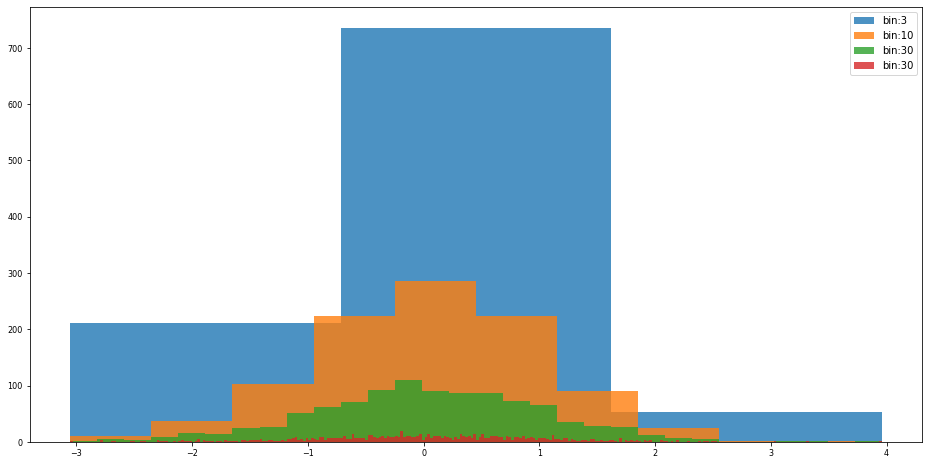

In [503]:
import matplotlib.pyplot as plt
plt.hist(x, bins = 3 , label="bin:3",alpha = 0.8)
plt.hist(x, bins = 10 , label="bin:10",alpha=0.8)
plt.hist(x, bins = 30 , label="bin:30",alpha=0.8)
plt.hist(x, bins = 300 , label="bin:30",alpha=0.8)
plt.legend()
#total area under the curve is equal to 1

Part B:
On the left, the histogram makes clear that this is a bimodal distribution.
On the right, we see a unimodal distribution with a long tail.
Without seeing the preceding code, you would probably not guess that these two histograms were built from the same data: with that in mind, how can you trust the intuition that histograms confer?
And how might we improve on this?

In [114]:
x = make_data(20)
bins1 = np.linspace(-5, 5, 10)
bin_length = bins1[1]-bins1[0]
bins2 = np.linspace(-5+bin_length/2,5+bin_length/2,10)

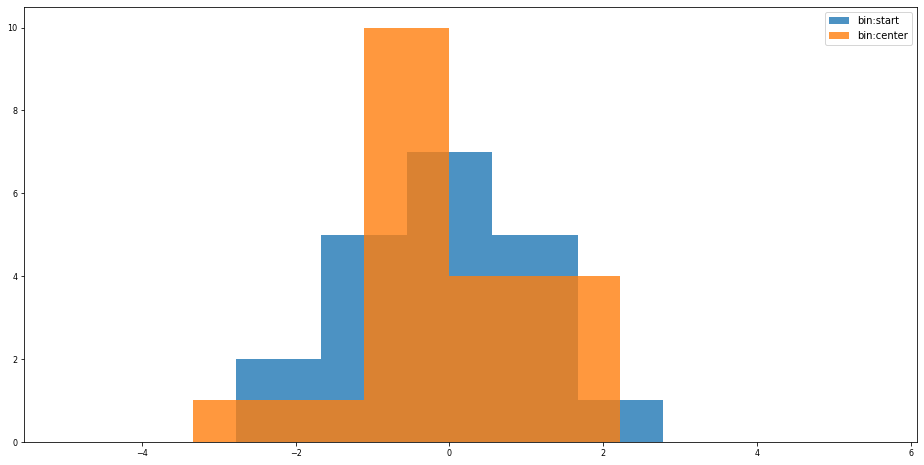

In [115]:
plt.hist(x, bins = bins1,label="bin:start", alpha = 0.8)
plt.hist(x, bins = bins2,label="bin:center", alpha = 0.8)
plt.legend()

# Q2 

In [124]:
import pandas as pd
import numpy as np
import math
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [58]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

# Part A: Complete following functions:

In [293]:
def hypercube_kernel(h, x, x_i):
    if np.linalg.norm(x-x_i) <= h/2:
        return 1
    else:
        return 0
    
def gaussian_kernel(h, x, x_i, sigma=0.1):
    return  multivariate_normal(mean=0, cov=sigma).pdf((x-x_i)/h)
    
def parzen_window(X, x, h, kernel_func):
    N = np.size(X,0)
    d = np.size(X,1)
    px = 1/N * 1/(h**d) * np.sum([kernel_func(h,x,xi) for xi in X ])  
    return px


def parzen(X, X1, h, kernel_func):
    probs = []
    for x in X1:
        px = parzen_window(X,x,h,kernel_func)
        probs.append(px)
    return np.array(probs)

Run the following code to generate and plot your data:

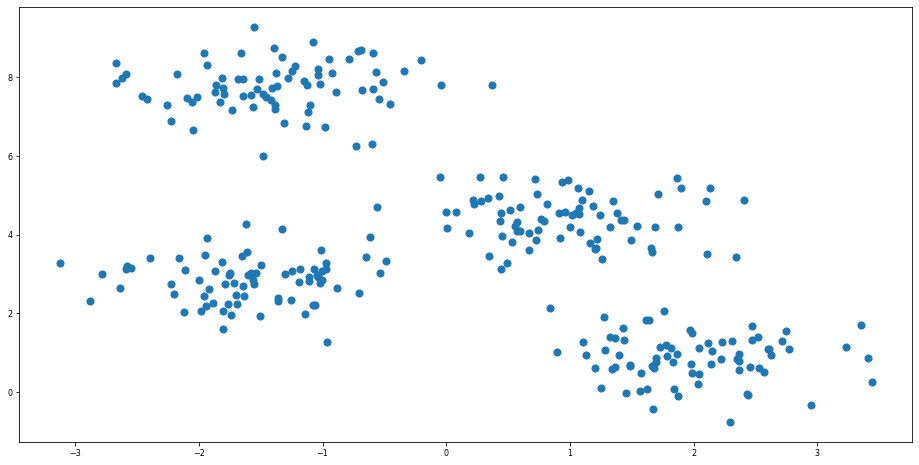

In [259]:
from sklearn.datasets import make_blobs
n_samples=300
nclasses = 4
X, y_true = make_blobs(n_samples=n_samples, centers=nclasses, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

Run the following code to initiate mesh grid and color map for each class:

In [260]:
x1min=min(X[:, 0])
x1max=max(X[:, 0])
x2min=min(X[:, 1])
x2max=max(X[:, 1])

x1min=x1min-(x1max-x1min)/10
x1max=x1max+(x1max-x1min)/10
x2min=x2min-(x2max-x2min)/10
x2max=x2max+(x2max-x2min)/10


x = np.linspace(x1min,x1max, 100)
y = np.linspace(x2min,x2max, 100)

xx, yy = np.meshgrid(x, y)
xy = np.c_[xx.ravel(), yy.ravel()]

classes=[ x for x in range(nclasses)]
cMap = mcolors.ListedColormap(colors[0:nclasses])

In [261]:
train_data = {}
for i in range(0,4):
    idx = np.where(y_true == i)[0]
    train_data[i] = X[idx]  

# Part B:

In [289]:
def draw_point_distribution(distclass,hsize,kernel):
    pz = parzen(train_data[distclass],xy,hsize,kernel).reshape(100, 100)
    for i in classes:
        data = train_data[i]
        plt.scatter(data[:,0],data[:,1], c=colors[i], marker='o',edgecolors='black', label="class "+str(i))
    plt.ylabel('$x_2$', fontsize=14)
    plt.xlabel('$x_1$', fontsize=14)
    plt.title('Parzen window estimation, class '+str(distclass)+', h = '+str(hsize))
    plt.legend()
    plt.imshow(pz,origin='lower', extent=(x1min,x1max,x2min,x2max), alpha=.5, aspect='auto')
    plt.show()

# Part C:

### hypercube kernel plots

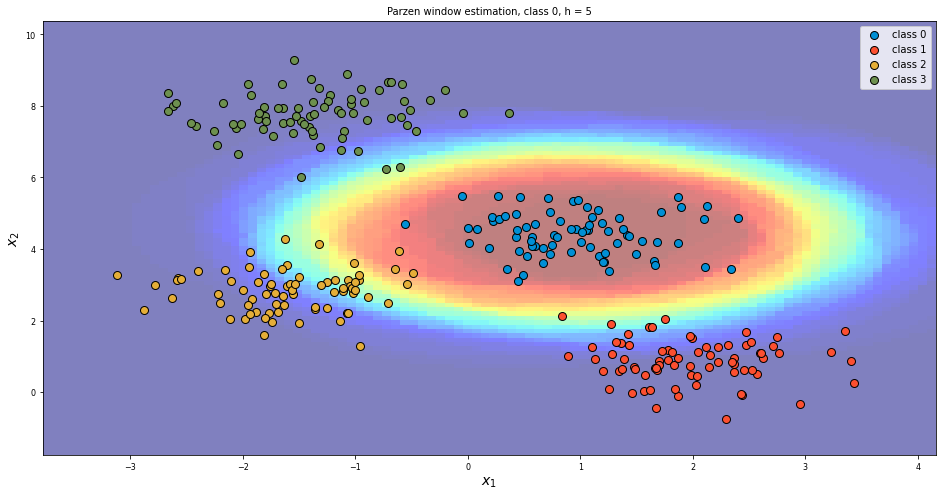

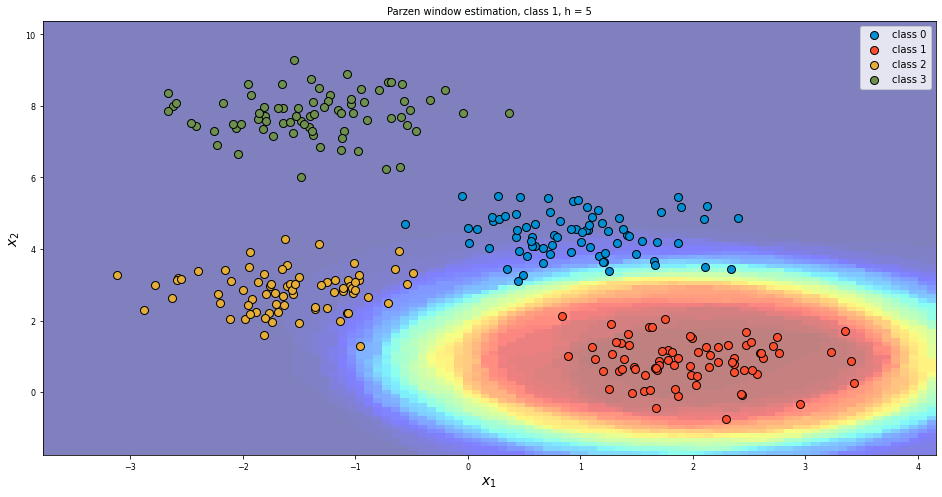

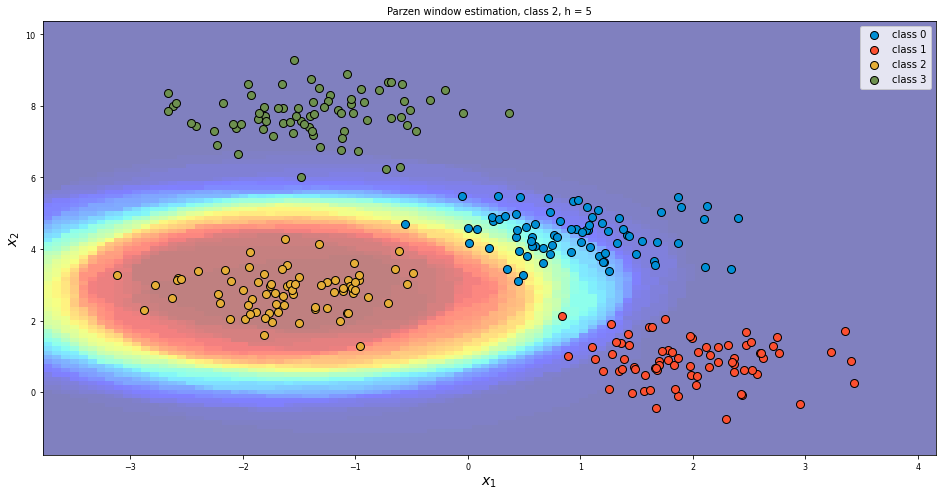

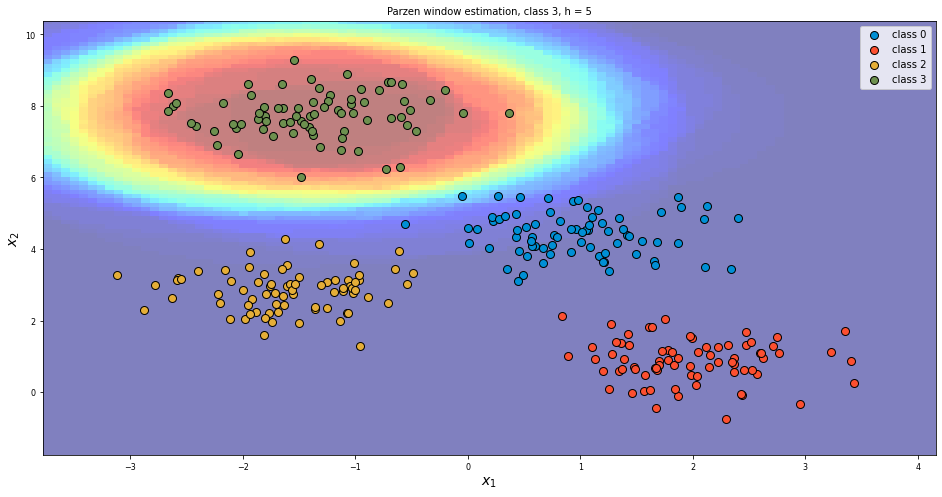

In [291]:
f = hypercube_kernel
h=5
distclasslist = [0,1,2,3]
for distclass in distclasslist:
    draw_point_distribution(distclass,h,f)

### guassian kernel plots

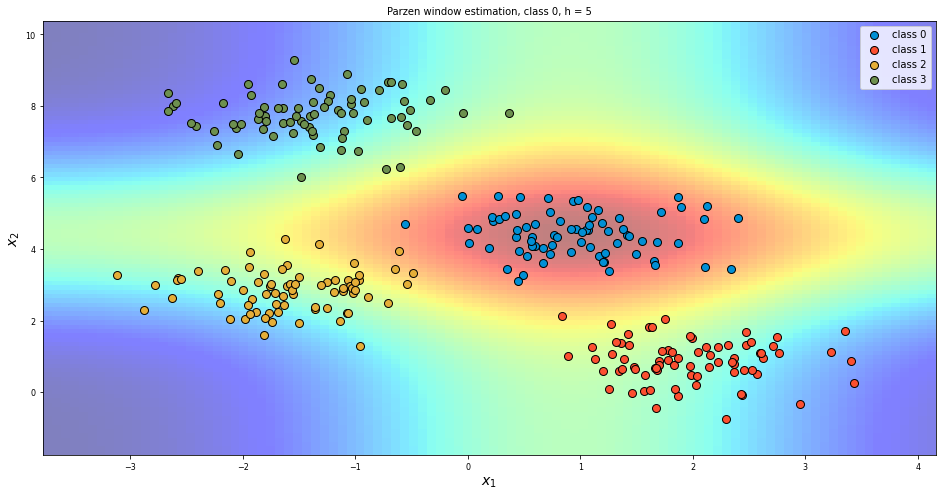

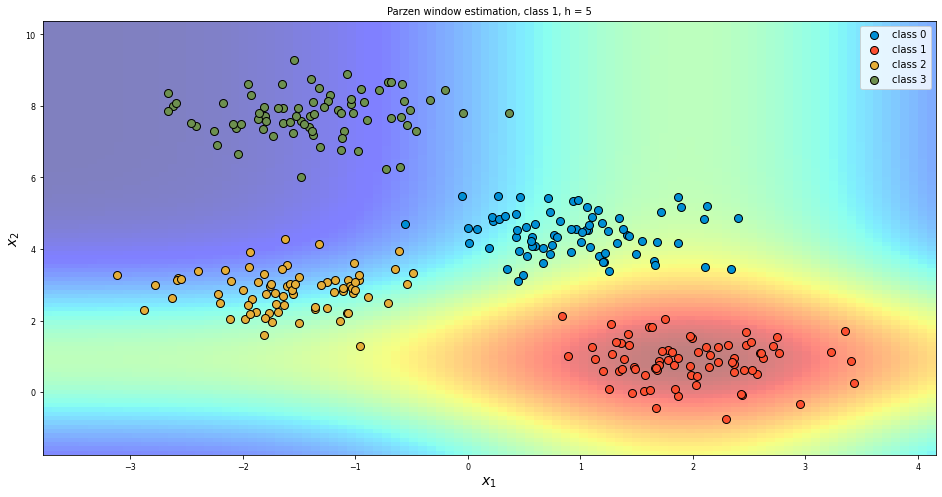

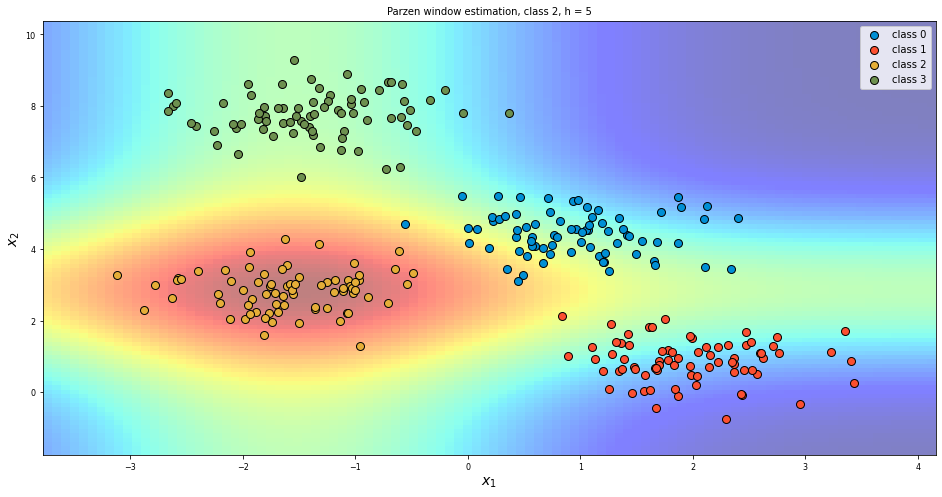

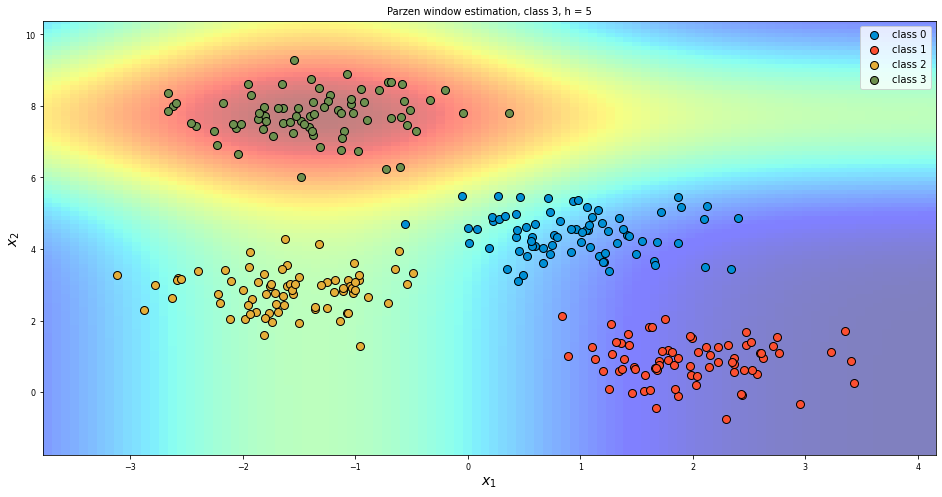

In [294]:
f = gaussian_kernel
h=5
distclasslist = [0,1,2,3]
for distclass in distclasslist:
    draw_point_distribution(distclass,h,f)

# Q3

In [333]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os  
import pickle

In [298]:
'''download dataset using following if on colab o.w. use the link'''
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

zsh:1: command not found: wget


# Part A:

In [434]:
def unpickle_batch(file):
    with open(file, 'rb') as batch_file:
        cifar = pickle.load(batch_file, encoding='bytes')
    X = cifar['data'.encode()]
    Y = cifar['labels'.encode()]
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    Y = np.array(Y)
    return X,Y


def load_CIFAR10(ROOT):
    x = []
    y = []
    for i in range(1,6):
        batch_file = os.path.join(ROOT, 'data_batch_'+str(i))
        Xb, Yb = unpickle_batch(batch_file)
        x.append(Xb)
        y.append(Yb)    
    Xtrain = np.concatenate(x)
    Ytrain = np.concatenate(y)
    Xtest, Ytest = unpickle_batch(os.path.join(ROOT, 'test_batch'))
    return Xtrain, Ytrain, Xtest, Ytest

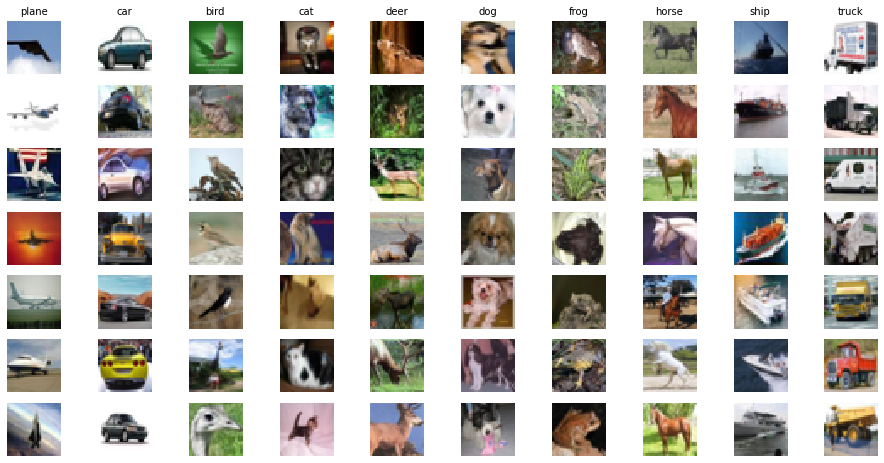

In [435]:
'''load and show the dataset'''
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
X_train, y_train, X_test, y_test = load_CIFAR10('cifar-10-batches-py')
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Part B:

In [436]:
def eucli_distance_function(x, X_train):
    return np.linalg.norm(X_train - x,axis=1)

def manhattan_distance_function(x, X_train):
    dist = []
    for i in range (0,len(X_train)):
        dist.append(np.abs(x - X_train[i]).sum())
    return dist

# Part C:

In [504]:
test_num = 1000
def KNN(X_train, y_train, X_test,k, distance_function):
    flatten_X_train = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
    flatten_X_test =  X_test.reshape(X_test.shape[0], 32 * 32 * 3)[:test_num]
    y_pred = []
    for x in flatten_X_test:
        dist = distance_function(x,flatten_X_train)
        knn_idx = np.argsort(dist)[:k]
        knn_labels = y_train[knn_idx]
        y_pred.append(np.bincount(knn_labels).argmax())
    return y_pred


In [505]:
def calculate_accuracy(X_train, y_train, X_test,y_test,k_list, distance_function):
    for k in k_list:
        y_pred = KNN(X_train, y_train, X_test, k,distance_function)
        print('k = %d, accuracy = %f' % (k,  np.mean(y_test[:len(y_pred)] == y_pred)))

## eucli_distance_function

In [506]:
k_list = [1,5,10,15,50,100]

In [507]:
calculate_accuracy(X_train, y_train, X_test,y_test,k_list,eucli_distance_function )

k = 1, accuracy = 0.209000
k = 5, accuracy = 0.211000
k = 10, accuracy = 0.204000
k = 15, accuracy = 0.212000
k = 50, accuracy = 0.190000
k = 100, accuracy = 0.180000


## manhattan_distance_function

In [ ]:
calculate_accuracy(X_train, y_train, X_test,y_test,k_list,manhattan_distance_function)